<div style="text-align: right">INFO 6210 Data Management and Database Design</div>
<div style="text-align: right"> Suman Rawat : NUID 001058600</div>
<div style="text-align: right"> Shakti Chetan : NUID 001375816</div>

# ASSIGNMENT 3

## Abstract
To convert the SQL database to NoSQL, and perform various operations on them to get the trends of users in social media. We have used the TwitchTV API and Data from out previous assignment to achieve the results. In this assignment, we will be converting our assignment 2 SQL database to NoSQL. The converted
database must have all of the domain related data in your assignment 2 SQL database. Any relational
tables that are a product solely to fit the relational model need not be transferred. The NoSQL database
uses is MongoDB. The NoSQL database is  extending the SQL database to answer the questions at the
bottom of this assignment. This may involve adding more data.

In [5]:
import pymongo
from bs4 import BeautifulSoup
import json
import pandas as pd
import requests
import lxml.html as lh
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## MongoDB 
MongoDB is a cross-platform, document oriented database that provides, high performance, high availability, and easy scalability. MongoDB works on concept of collection and document. Collection is a group of MongoDB documents. It is the equivalent of an RDBMS table. A collection exists within a single database. Collections do not enforce a schema. Documents within a collection can have different fields. Typically, all documents in a collection are of similar or related purpose.

## Establishing Connection
To establish a connection we’ll use the MongoClient object.

The first thing that we need to do in order to establish a connection is import the MongoClient class. We’ll use this to communicate with the running database instance. Use the following code to do so

In [11]:
myclient = pymongo.MongoClient("mongodb://localhost:27017/")
mydb = myclient["mydatabase"]
games= mydb["games"]
channels = mydb["channels"]
topgames = mydb["topgames"]

# API
Calling the Twitch TV api

In [6]:
url = 'https://api.twitch.tv/kraken/search/streams?query=gta&limit=100'
headers = {'Accept': 'application/vnd.twitchtv.v5+json', 'Client-ID':'3a9k0fijniv1jb28fxjvkixwv1kajn' }
res = requests.get(url,headers = headers)
resjson = res.json()

In [7]:
ar = resjson["streams"]

### 1. Sample Data

In [126]:
ar

[{'_id': 1118098737,
  'game': 'Grand Theft Auto V',
  'broadcast_platform': 'live',
  'community_id': '',
  'community_ids': [],
  'viewers': 14656,
  'video_height': 900,
  'average_fps': 60,
  'delay': 0,
  'created_at': '2020-04-07T17:30:53Z',
  'is_playlist': False,
  'stream_type': 'live',
  'preview': {'small': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_kendinemuzisyen-80x45.jpg',
   'medium': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_kendinemuzisyen-320x180.jpg',
   'large': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_kendinemuzisyen-640x360.jpg',
   'template': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_kendinemuzisyen-{width}x{height}.jpg'},
  'channel': {'mature': True,
   'status': 'GTA RP misali Kenan Parlak',
   'broadcaster_language': 'tr',
   'broadcaster_software': 'unknown_rtmp',
   'display_name': 'KendineMuzisyen',
   'game': 'Grand Theft Auto V',
   'language': 'tr',
   '_id': 79087140,
   'name': 'kendinemuzisyen',
   'creat

In [9]:
channel =[]
for r in ar:
    channel.append(r["channel"])
channel

[{'mature': False,
  'status': 'AARON FLASH PIÉGÉ PAR DAVID JR ! GTAV RP ',
  'broadcaster_language': 'fr',
  'broadcaster_software': 'unknown_rtmp',
  'display_name': 'iProMx',
  'game': 'Grand Theft Auto V',
  'language': 'fr',
  '_id': 83727379,
  'name': 'ipromx',
  'created_at': '2015-02-25T07:22:48.215883Z',
  'updated_at': '2020-04-08T19:47:51.176226Z',
  'partner': True,
  'logo': 'https://static-cdn.jtvnw.net/jtv_user_pictures/d933b0c4-f8f6-4c77-a19a-1311e960faa1-profile_image-300x300.jpeg',
  'video_banner': 'https://static-cdn.jtvnw.net/jtv_user_pictures/4d30dfd5-331d-4040-b6ad-2bb950aed852-channel_offline_image-1920x1080.jpeg',
  'profile_banner': 'https://static-cdn.jtvnw.net/jtv_user_pictures/7a193f03-52af-4a49-8b4f-aaa2703aa75f-profile_banner-480.jpg',
  'profile_banner_background_color': '',
  'url': 'https://www.twitch.tv/ipromx',
  'views': 1329736,
  'followers': 121464,
  'broadcaster_type': 'partner',
  'description': 'Salut à toi mon poto, bienvenue sur ma chaîne!

### 2. Code For Insert queries : 
To insert data into a NoSQL database in Python 3, we use the insert() method. We can even insert many documents at a time, which is much faster than using insert_one() if you have many documents to add to the database. The method to use here is insert_many(). This method takes an array of document data

In [ ]:
games.insert_many(ar)

In [135]:
channels.insert_many(channel)

## Q1: What are tags are associated with each steamer ?

In [171]:
cursor = channels.find({},{"display_name":1,"status":1})
tagsdf = pd.DataFrame(list(cursor))

In [173]:
selcols = ['display_name','status']
newtagsdf = pd.DataFrame(tagsdf,columns = selcols)

In [174]:
newtagsdf = newtagsdf.rename(columns = {"display_name":'Name','status':'Tags'})

### Tags associated with each streamer

In [175]:
newtagsdf

,Name,Tags
0,KendineMuzisyen,GTA RP misali Kenan Parlak
1,Tiagovski555YT,A GRANDE ABERTURA DO GOLDEN CASINO GTA V RP | ...
2,RatedEpicz,Randy Bullet Chang Gang Million Dollar Race | ...
3,Ramee,Ramee | !IronsidePC !GFuel | Chang Gang GTA V RP
4,JulietteArz,HOPE LSPD [FLASHLAND] | !legion !lastvid !gta ...
...,...,...
88,Jack90Bauer,GTA Online: The Diamond Casino Heist
89,snoopygottablaze,Streaming With Snoop Da Loop
90,Legoplay_HD,GTA Online Casino Heist | | Creator Code: Leg...
91,overfive21,Minecraft


## Q2. What user/ Streamers are like other user/ Streaers in our video game domain

In [14]:
cursor2 = channels.find({"game": { "$regex": "^G"}},)

### User who play similar video games for example GTA

In [ ]:
q2df = pd.DataFrame(list(cursor2))
q2df1 = pd.DataFrame(q2df,columns=["name",'game'])
q2df1

### Users who are broadcast partners

In [207]:
cursor3 = channels.find({"broadcaster_type": { "$regex": "^p"}},)

In [208]:
q21df = pd.DataFrame(list(cursor3))
q21df1 = pd.DataFrame(q21df,columns=["name",'broadcaster_type'])
q21df1

,name,broadcaster_type
0,kendinemuzisyen,partner
1,tiagovski555yt,partner
2,ratedepicz,partner
3,ramee,partner
4,juliettearz,partner
5,newia,partner
6,davyjones,partner
7,minostv_,partner
8,buomorallez,partner
9,spajkk,partner


## Q3. What people or users are popular in video game domain?

In [219]:
popuserscur = channels.find({},{"_id":0,"name":1,"views":1}).sort("views",-1)
popusers = pd.DataFrame(list(popuserscur))

### Popular Users by Views

In [221]:
popusers

,name,views
0,yogscast,128433009
1,kendinemuzisyen,38109160
2,davyjones,11804975
3,spajkk,7892835
4,ratedepicz,5728003
...,...,...
88,artl96,71
89,mar4okaue,49
90,itsmalcolmsmithjr,41
91,xs_gta_king89,20


In [237]:
popusers = popusers[:5]

Plotting a bar graph for the top popular users by total number of their viewres. In the graph X-axis is the popular streamers name vs y-axis is total number of viewers each streamers has

In [ ]:
import matplotlib
matplotlib.pyplot.bar(popusers["name"],popusers["views"])
matplotlib.pyplot.ylabel('Views(X10^8)')
matplotlib.pyplot.xlabel('Streamers')
matplotlib.pyplot.title('Popular Streamrs by Views')
print("Top 5 Users by Views")

## Q4. Trending Games amoung Streamers

In [240]:
url2 = "https://api.twitch.tv/kraken/games/top"
# headers = {'Accept': 'application/vnd.twitchtv.v5+json', 'Client-ID':'3a9k0fijniv1jb28fxjvkixwv1kajn' }
res2 = requests.get(url2,headers = headers)

In [246]:
array = res2.json()["top"]
topgames.insert_many(array)

In [268]:
cur4 = topgames.find({},{"_id":0,"game.name":1,"channels":1})
q4 = list(cur4)

In [286]:
ab = json.dumps(q4)
trends = json.loads(ab)

In [293]:
dic = {}
for game in trends:
    dic[game["game"]["name"]] = game["channels"]

### Trending Games

In [312]:
tg = pd.DataFrame(dic.items(), columns=['Game', 'Channels'])
tg    

,Game,Channels
0,VALORANT,6800
1,Just Chatting,3220
2,Grand Theft Auto V,2271
3,League of Legends,4297
4,Fortnite,11319
5,Call of Duty: Modern Warfare,9601
6,Counter-Strike: Global Offensive,3057
7,Hearthstone,656
8,Minecraft,2631
9,Dota 2,817


Text(0.5, 1.0, 'Trending Games')

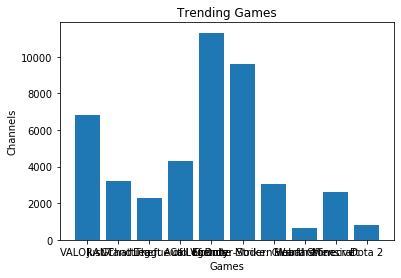

In [314]:
matplotlib.pyplot.bar(tg["Game"],tg["Channels"])
matplotlib.pyplot.ylabel('Channels')
matplotlib.pyplot.xlabel('Games')
matplotlib.pyplot.title('Trending Games')

## Implementing the Use-cases

In [326]:
#Use Case 1
case1 = list(channels.find({},{"display_name":1,"status":1}))
#Use Case 2
case2 = list(channels.find({"game": { "$regex": "^G"}},))
#Use Case 3
case3 = list(channels.find({},{"_id":0,"name":1,"views":1}).sort("views",-1))
#Use Case 4
case4 = list(topgames.find({},{"_id":0,"game.name":1,"channels":1}))

## Design Chioices Made

<img src="sqlSchema.png">

Using the above schema we converted it to a NoSql database in MongoDB. We created differnt collections for each of the above table. The snippet of the collections can be seen below.


#### Channels Collection

In [331]:
list(channels.find().limit(2))

[{'_id': 79087140,
  'mature': True,
  'status': 'GTA RP misali Kenan Parlak',
  'broadcaster_language': 'tr',
  'broadcaster_software': 'unknown_rtmp',
  'display_name': 'KendineMuzisyen',
  'game': 'Grand Theft Auto V',
  'language': 'tr',
  'name': 'kendinemuzisyen',
  'created_at': '2015-01-06T17:59:53.216749Z',
  'updated_at': '2020-04-07T22:06:54.57841Z',
  'partner': True,
  'logo': 'https://static-cdn.jtvnw.net/jtv_user_pictures/8f56178e-94ea-4278-9ab9-cca5d541bc47-profile_image-300x300.jpeg',
  'video_banner': 'https://static-cdn.jtvnw.net/jtv_user_pictures/51f81d26-97ec-412b-b6fb-521c32d3beca-channel_offline_image-1920x1080.jpeg',
  'profile_banner': None,
  'profile_banner_background_color': '',
  'url': 'https://www.twitch.tv/kendinemuzisyen',
  'views': 38109160,
  'followers': 1132258,
  'broadcaster_type': 'partner',
  'description': 'Müzik yapmayı severim.',
  'private_video': False,
  'privacy_options_enabled': False},
 {'_id': 246532465,
  'mature': False,
  'status':

### Games Collection

In [334]:
list(games.find().limit(2))

[{'_id': 1118098737,
  'game': 'Grand Theft Auto V',
  'broadcast_platform': 'live',
  'community_id': '',
  'community_ids': [],
  'viewers': 14656,
  'video_height': 900,
  'average_fps': 60,
  'delay': 0,
  'created_at': '2020-04-07T17:30:53Z',
  'is_playlist': False,
  'stream_type': 'live',
  'preview': {'small': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_kendinemuzisyen-80x45.jpg',
   'medium': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_kendinemuzisyen-320x180.jpg',
   'large': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_kendinemuzisyen-640x360.jpg',
   'template': 'https://static-cdn.jtvnw.net/previews-ttv/live_user_kendinemuzisyen-{width}x{height}.jpg'},
  'channel': {'mature': True,
   'status': 'GTA RP misali Kenan Parlak',
   'broadcaster_language': 'tr',
   'broadcaster_software': 'unknown_rtmp',
   'display_name': 'KendineMuzisyen',
   'game': 'Grand Theft Auto V',
   'language': 'tr',
   '_id': 79087140,
   'name': 'kendinemuzisyen',
   'creat

# Report

* The main objective of this assignment is to learn the conversion of relational database into a NoSQL database. There are various issues with SQL whenever we have to deal with the large scale of data. TO overcome such problems we will use MognoDB. Following are the few reason to use NoSql and MongoDB :
   1. Schemas are typically dynamic for NoSQL but fixed for SQL.
   2. NoSQL can have different kinds of database, as discussed, but SQL has only one.
   3. NoSQL came around in the late 2000s, SQL has been here since 1970s.
   4. For SQL, the data storage model is individual records, but for NoSQL, this depends on the database type.
   5. NoSQL has horizontal scaling; SQL has vertical.
   6. Instead of large monolithic servers and storage infrastructure, organizations now use cloud computing, open-source software, and commodity servers.
   7. Projects now adopt agile approaches instead of long waterfall traditions (Agility).
   8. There is a need to work with large volumes of data that changes type often. These types include unstructured, semi-structured, structured, and polymorphic data.
   9. The size of audiences has grown exponentially over the years (Scalability).


We are using same dataset as we used for assignment 2. This video games dataset contains various details of games like, game unique id, game name, number of viewers, stream type, broadcast language, broadcast software, preview, created date and community id

* Questions :

    1. What are tags are associated with a person, place or thing?
       
       For finding the tags associated with each streamer we will extract display_name and status for each entry, where status represents the tags. After extraction convert the result into a panda dataframe.
<br>
</br>
    2. What social media users are like other social media users in your domain?
   
       Alike social media user will be those streams who are playing similar kind of video games. For this we are using regex expressions for finding the similar games. For example we are trying to find the all the streamers playing GTA(Grand Theft Auto). To achieve this we are using regex expression where all games starts contain GTA. This will give us the name of the streamer and video game name from all channels. Apart from this there are user who are broadcast partners they all fall in similar kind of users. For this also we are using the regex and finding all names of this type user.
<br>
</br>
    3. What people, places or things are popular in your domain?
     
       Popular user in a video game domain will be those having most number in views. To find such users we will use find() function and providing parameters such as id, game, views. Then sort this list on the basis of number of views in descending order then convert it into a panda dataframe. We have also plotted a graph for the top 5 user based on thier total viewers. 
<br>
</br>
     4. What people, places or things are trending in your domain? (A trend is popularity over time.)
   
        Trending games among the streamers are those which are played most and talked about among streamers. For this we have used another api of twitch API. This API will give us the top 10 games trending these days. Using find() function we will extract only relevant information like game id, game name and number of channels in which a particular is being played. For a better visual we will convert this list into a dataframe and then displaying the bar plot for the trending games.
<br>
</br>
   5. A description of the design choices you made in converting your SQL Schema that makes sense.
   
   Each database in MongoDB consists of collections which are equivalent to an RDBMS database consisting of SQL tables. Each collection stores data in the form of documents which is equivalent to tables storing data in rows. While a row stores data in its set of columns, a document has a JSON-like structure (known as BSON in MongoDB). Lastly, the way we have rows in an SQL row, we have fields in MongoDB. This document is equivalent to a single row in RDBMS. A collection consists of many such documents just as a table consists of many rows. Note that each document in a collection has a unique _id field, which is a 12-byte field that serves as a primary key for the documents. The field is auto generated on creation of the document and is used for uniquely identifying each document.
   

# Conclusion
We converted the Sql database to NoSQL database. Then we found the tags associated with each streamer and the similarities betwwen them. We used the data to find the trend of Game Streams over time and the popular Steamers. We also described the reasons for converting the sql to nosql and design choices made. Perfomed all CRUD operation on MongoDB

# Contribution
1. Conception or design of the work – Shakti and Suman
2. Data collection for Web scraping: Suman
3. Data collection for web API and raw csv file: Shakti Chetan
4. Drafting the article: Suman
5. SQL to NoSQ: Sh

# References

1. https://stackoverflow.com/questions/30164478/tags-in-mongodb
2. https://docs.mongodb.com/manual/tutorial/configure-replica-set-tag-sets/
3. https://www.tutorialspoint.com/mongodb/mongodb_create_database.html
4. https://realpython.com/introduction-to-mongodb-and-python/
5. https://data-flair.training/blogs/python-stemming/
6. https://api.mongodb.com/python/current/
7. https://code.tutsplus.com/articles/mapping-relational-databases-and-sql-to-mongodb--net-35650

# License 
Copyright (c) 2020, Suman Rawat and Shakti Chetan
All rights reserved.

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.